#Introducción


En este cuaderno, se resolverá el [TPC01 - Conceptos Básicos](http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_ConceptosBasicos.pdf). En el mismo se podrán leer los resultados de los ejercicios, el código implementado para la resolución y comentarios sobre las tareas realizadas.
Para cada ejercicio, se requiere trabajar con una base de datos distinta. Algunas redes están dadas por archivos .txt; otras, vienen como archivos .gml. 
[Aquí un enlace a los datos](http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_data.zip). Para poder ejecutar el archivo, deben estar subidos al directorio del cuaderno donde se lo abre para poder cargarlo. Hay una celda específica para tal fin. 



In [0]:
#importamos las librerías a utilizar
import networkx as nx
import matplotlib.pylab as plt

#creamos función para abrir .txt
def abrir_txt(nombre_archivo):
	archivo=open(nombre_archivo)
	data=[]
	for linea in archivo:
		linea=linea.strip()
		columna=linea.split()
		data.append(columna)	
	return data

#Ejercicio 1
La idea de este ejercicio es indagar en algunas de las características topológicas principales de tres redes de interacción de proteínas de la levadura de cerveza.

##Inciso (a)
En este inciso, queremos simplemente visualizar las tres redes. Para esto, primero, necesitamos generarnos las redes a partir de las listas de enlaces obtenidas de la lectura de los .txt. Luego, podemos generar las visualizaciones con networkx.

In [0]:
#subimos la data
#TODO: subir al drive y cambiar esto!!!
from google.colab import files

files.upload()

Saving dolphins.txt to dolphins (1).txt
Saving dolphinsGender.txt to dolphinsGender (1).txt
Saving yeast_Y2H.txt to yeast_Y2H (1).txt
Saving yeast_AP-MS.txt to yeast_AP-MS (1).txt
Saving yeast_LIT.txt to yeast_LIT (1).txt
Saving dolphins.gml to dolphins (1).gml


{'dolphins.gml': b'Creator "Mark Newman on Wed Jul 26 15:04:20 2006"\ngraph\n[\n  directed 0\n  node\n  [\n    id 0\n    label "Beak"\n  ]\n  node\n  [\n    id 1\n    label "Beescratch"\n  ]\n  node\n  [\n    id 2\n    label "Bumper"\n  ]\n  node\n  [\n    id 3\n    label "CCL"\n  ]\n  node\n  [\n    id 4\n    label "Cross"\n  ]\n  node\n  [\n    id 5\n    label "DN16"\n  ]\n  node\n  [\n    id 6\n    label "DN21"\n  ]\n  node\n  [\n    id 7\n    label "DN63"\n  ]\n  node\n  [\n    id 8\n    label "Double"\n  ]\n  node\n  [\n    id 9\n    label "Feather"\n  ]\n  node\n  [\n    id 10\n    label "Fish"\n  ]\n  node\n  [\n    id 11\n    label "Five"\n  ]\n  node\n  [\n    id 12\n    label "Fork"\n  ]\n  node\n  [\n    id 13\n    label "Gallatin"\n  ]\n  node\n  [\n    id 14\n    label "Grin"\n  ]\n  node\n  [\n    id 15\n    label "Haecksel"\n  ]\n  node\n  [\n    id 16\n    label "Hook"\n  ]\n  node\n  [\n    id 17\n    label "Jet"\n  ]\n  node\n  [\n    id 18\n    label "Jonah"\n  ]\n  

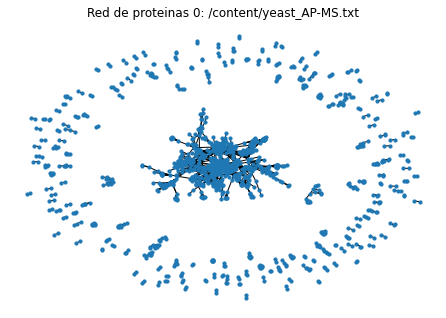

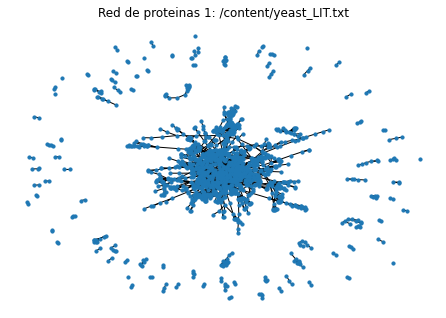

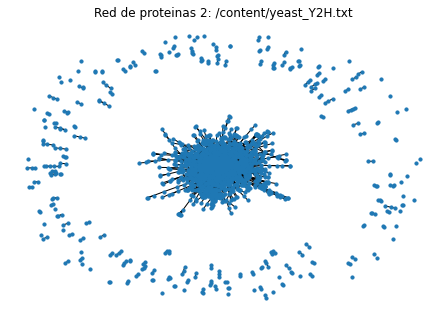

In [0]:
red_1 = '/content/yeast_AP-MS.txt'
red_2 = '/content/yeast_LIT.txt'
red_3 = '/content/yeast_Y2H.txt'
redes = [red_1, red_2, red_3]
data = {}

for i, red in enumerate(redes):
  lista_de_enlaces_i = abrir_txt(red)
  Red_proteinas_i = nx.Graph()
  Red_proteinas_i.add_edges_from(lista_de_enlaces_i)
  data[red] = {}
  data[red]["Grafo"] = Red_proteinas_i
  nx.draw(Red_proteinas_i, node_size = 10)
  plt.title(f"Red de proteinas {i}: {red}")
  plt.show()



  
  



#ACA PODRIAMOS PONERLAS MAS LINDAS (una al lado, etc)


##Inciso (b)
En este inciso buscamos comparar características topológicas de las redes. Para lo mismo creamos un diccionario de diccionarios. Es decir, guardamos en "data" un diccionario para cada red con sus características. Escribimos una función que consigue los atributos pertinentes de cada red. 


In [0]:
def get_red_info(data_dict):
  red = data_dict['Grafo']
  data_dict['Nodos'] = red.number_of_nodes() 
  data_dict['Enlaces'] = red.number_of_edges()
  data_dict['Grado medio'] = 2 * data_dict['Enlaces'] / data_dict['Nodos']
  
  grados = red.degree() # devuelve grado de cada nodo, como tupla
  grado_max = 0 #inicializo en cero
  grado_min = float('inf') #inicializo en infinito
  for nodo in grados:
    if (nodo[1]) > grado_max:
      grado_max = nodo[1]
      nodo_max = nodo[0]
    if (nodo[1]) < grado_min:
      grado_min = nodo[1]
      nodo_min = nodo[0]
  data_dict['Grado max'] = grado_max
  data_dict['Grado min'] = grado_min
  data_dict['Densidad'] = nx.density(red)

  componentes=[red.subgraph(componente) 
                      for componente in sorted(nx.connected_components(red), 
                                               key=len, reverse=True)]
  data_dict['Diametro'] = nx.diameter(componentes[0])
  data_dict['Clustering medio'] = nx.average_clustering(red)
  data_dict['Clustering delta'] = nx.transitivity(red) #

#Red dirigida/no

#C_DELTA chequear o ponerle un comentario
#Tamaño de compo gigante
#grado min de comp gigante
#cantidad de nodos de cada componenntes



get_red_info(data[red_1])
get_red_info(data[red_2])
get_red_info(data[red_3])

#Falta hacer el df


In [0]:
#Ejemplo de como ver la data
data[red_1]['Grado min']

1

### Inciso c

Luna

### Inciso d


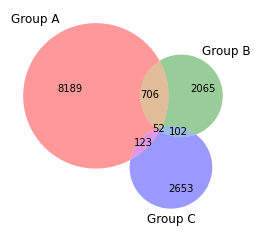

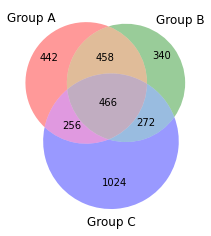

In [0]:
Red_proteinas_1 = data[red_1]['Grafo']
Red_proteinas_2 = data[red_2]['Grafo']
Red_proteinas_3 = data[red_3]['Grafo']

#https://python-graph-gallery.com/venn-diagram/
def venn_3(a,b,c):
	abc= a.intersection(b).intersection(c)
	ab= a.intersection(b).difference(abc)
	ac= a.intersection(c).difference(abc)
	bc= b.intersection(c).difference(abc)

	#defino nuevos a_,b_ y c_
	a_=a.difference(b.union(c))
	b_=b.difference(a.union(c))
	c_=c.difference(b.union(a))

	# Import the library
	import matplotlib.pyplot as plt
	from matplotlib_venn import venn3

	# Custom text labels: change the label of group A
	v=venn3(subsets = (len(a_), len(b_), len(ab), len(c_),len(ac),len(bc),len(abc)), set_labels = ('Group A', 'Group B', 'Group C'))
	plt.show()

a, b, c=set(), set(), set()
for enlace in Red_proteinas_1.edges(): a.add(enlace)
for enlace in Red_proteinas_2.edges(): b.add(enlace)
for enlace in Red_proteinas_3.edges(): c.add(enlace)
# los enlaces habria que invertirlos si no estan direccionados:
# o quizas ordenarlos de alguna forma antes de agregarlos
#for enlace in Red_proteinas_1.edges(): a.add(enlace);a.add((enlace[1],enlace[0]))
#for enlace in Red_proteinas_2.edges(): b.add(enlace);b.add((enlace[1],enlace[0]))
#for enlace in Red_proteinas_3.edges(): c.add(enlace);c.add((enlace[1],enlace[0]))
venn_3(a,b,c)


a, b, c=set(), set(), set()
for enlace in Red_proteinas_1.nodes(): a.add(enlace)
for enlace in Red_proteinas_2.nodes(): b.add(enlace)
for enlace in Red_proteinas_3.nodes(): c.add(enlace)
venn_3(a,b,c)


#Ejercicio 2
En este ejercicio se busca estudiar una población de delfines y tratar de entender cómo son los vínculos entre dicha población y si dichos vínculos tienen que ver con el sexo de los delfines. Basicamente, queremos entender si la población de delfines es homofílica. La red social es no direccionada. 



##Inciso (a)
La idea de este inciso es explorar las distintas posibilidades de layout que nos otorga networkx en función de determinar cuál es la mejor para dar cuenta de la estructura subyacente a la red.
Existen múltilpes layouts, la idea es que probemos tres o cuatro. Algunos de ellos son: 'spring' (por default), 'random', 'circle', "spectral'.

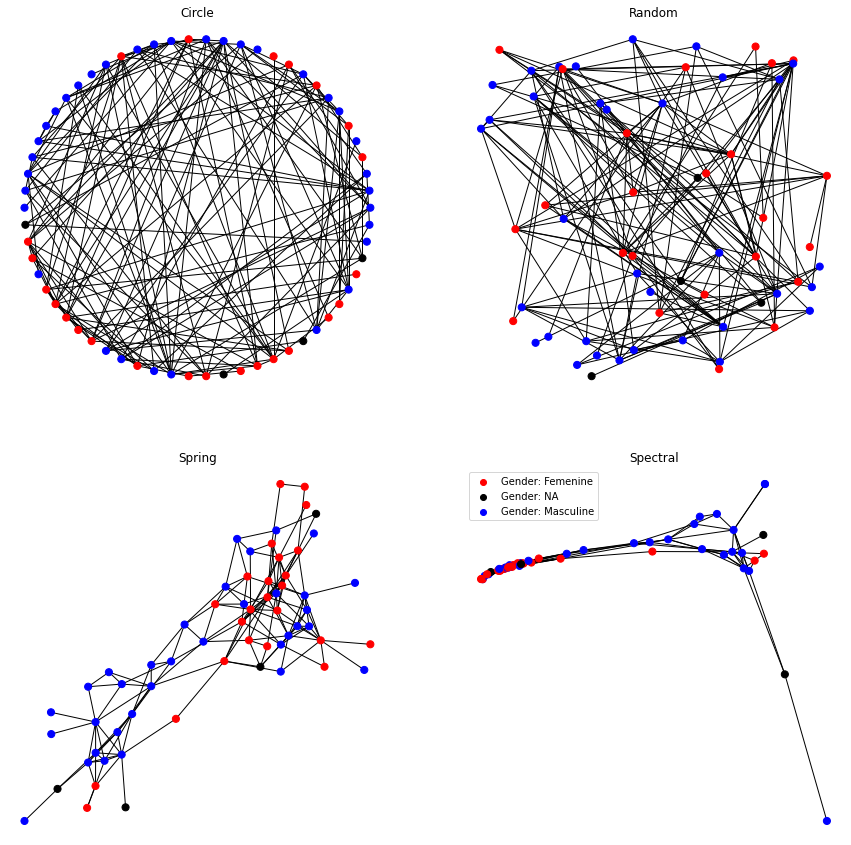

In [0]:
Red_delfines = nx.read_gml('dolphins.gml')
dolphins_gender = abrir_txt('/content/dolphinsGender.txt')
gender_dict = dict(dolphins_gender)
nx.set_node_attributes(Red_delfines, gender_dict, 'gender')

node_color = []

for node in Red_delfines.nodes(data=True):
  if 'm' in node[1]['gender']:
    node_color.append('blue')
    
  elif 'f' in node[1]['gender']:
    node_color.append('red')
    
  elif 'NA' in node[1]['gender']:
    node_color.append('black')


f, axs = plt.subplots(2, 2, figsize=(15,15))
axs = axs.flatten()

nx.draw_circular(Red_delfines, node_size= 50, ax = axs[0], node_color=node_color)
axs[0].set_title("Circle")

nx.draw_random(Red_delfines, node_size= 50, ax = axs[1], node_color=node_color)
axs[1].set_title("Random")

nx.draw(Red_delfines, node_size= 50, ax = axs[2], node_color=node_color) #default
axs[2].set_title("Spring")

nx.draw_spectral(Red_delfines, node_size= 50, ax = axs[3], node_color=node_color)
axs[3].set_title("Spectral")


label = {'blue': 'Masculine', 'red':'Femenine', 'black':"NA"}
for color in set(node_color):
    plt.scatter([],[], c = color, label='Gender: {}'.format(label[color]))

plt.legend()
plt.show()

#circle reordenado

Acá ponemos la que más nos copa, con los colores de géneros y hablamos bla bla

##Inciso b
El objetivo de este inciso es ver si hay _homofilia_ en la variable género. Es decir, analizar la fracción de enlaces, sobre el total, que vincule delfines del mismo sexo. Se pueden contar los enlaces que vinculan macho con macho y los de hembra con hembra.

Para poder comprender la significancia de la cantidad (si este valor es grande o chico) necesitamos compararlo. Para eso se repite el cálculo sobre redes aleatorias. 

Pero enteniendo aleatoriedad en el sentido de romper algunas de las relaciones existentes en la red real pero no todas. Por ejemplo, una posibilidad es asignar los géneros aleatoriamente entre los delfines, utilizando la distribución real de géneros. Otra posibilidad es recablear la red, manteniendo la distirbución de grado intacta. Para esta última alternativa existen funciones en networkx.



In [0]:
enlaces_original = nx.attr_matrix(Red_delfines, node_attr='gender', rc_order = ['f', 'm', 'NA'])
pares_fm = enlaces_original[0,1]
print(f'Cantidad de pares entre genero femenino y masculino en la red original {pares_fm}')
enlaces_original

Cantidad de pares entre genero femenino y masculino en la red original 52.0


matrix([[36., 52.,  4.],
        [52., 60.,  7.],
        [ 4.,  7.,  0.]])

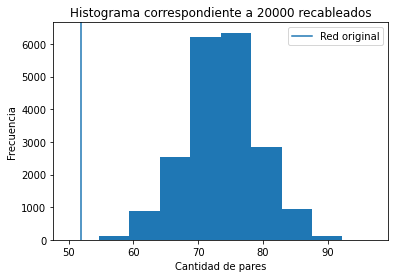

In [0]:
pares_de_enlaces_a_cambiar = 0.2*Red_delfines.number_of_edges()

Red_mezclada = Red_delfines.copy()

times=20000
i=0
new_pares_fm = []

while i < times:
  Red_mezclada = nx.double_edge_swap(Red_mezclada, nswap=pares_de_enlaces_a_cambiar, max_tries=100)
  enlaces_mezcla = nx.attr_matrix(Red_mezclada, node_attr='gender', rc_order = ['f', 'm', 'NA'])
  new_pares_fm.append(enlaces_mezcla[0,1])
  i=i+1

plt.figure()
plt.hist(new_pares_fm)
plt.xlabel('Cantidad de pares')
plt.ylabel('Frecuencia')
plt.title(f'Histograma correspondiente a {times} recableados')
plt.axvline(pares_fm, label = 'Red original')
plt.legend()
plt.show()


# Ejercicio 3
La idea general de este ejercicio es, a partir de la red de sistemas autónomos de internet, adquirir la noción de distribución de grado y las distintas estrategias que pueden utilizarse para estudiar dicha distribución.
## Inciso (a)
La idea de este inciso es graficar la distribución de grado de distintas maneras para tener una apoximación a la naturaleza de dicha distribución.
Si bien existen muchas librerías que permiten generar histogramas, las dos más usuales son: numpy y matplotlib. La segunda nos permite mediante un simple comando generar el histograma y graficar al mismo tiempo. En cambio, con la primera, generamos la distribución, y después necesitamso de otra librería para graficar.


```
# Lista con los grados de los nodos (una de las posibilidades de generarla)

lista_de_grados = []
for nodo in Red.nodes()
  grado = Red.degree(nodo)
  lista_de_grados.append(grado)

# Caso 1
plt.hist(lista_de_grados) # La función plt.hist() tiene muchos atributos: cantidades de bins, normalización, etc
plt.show()

# Caso 2
hist, bins = np.histogram(lista_de_grados) # Esta función también tiene varios atributos: cantidad de bins, espaciado, etc.
# bins es un array que da cuenta de dónde comienza y dónde termina cada bin, por lo tanto, tiene un elemento más que hist, que son la cantidad de nodos que caen dentro de un determinado bin. Tenemos que definir si tomaremos el centro de los bines, el comienzo o el final. En el siguiente ejemplo tomamos el comienzo
plt.bar(x = bins[:-1], height = hist, width = np.diff(bins))
plt.show()

```
La idea es que prueben cómo se ve la distribución de grado al variar la escala con la que se grafica (lineal o logarítmica) y al variar el bineado que se utiliza, es decir: bineado lineal o bineado logaritmico (usar un tamaño de bin constante o uno que varíe).
## Inciso (b)
Se busca encontrar la relación funcional para la distribución de grado. Para esto, se recomienda utilizar la librería scipy y sus funciones para ajustar.



#Ejercicio 4
La idea principal de este ejercicio es estudiar si en las redes propuestas (ojo, la red de colaboraciones es una red pesada) existe asortatividad en el grado. Más en general, comprender cuál es el grado medio de los vecinos de un nodo, en función del grado de este nodo. A su vez, se pide que se repita el análisis para las redes de proteínas vistas anteriormente.

# Inciso (a)
Para este inciso, es importante entender los pasos necesarios para llevar acabo la tarea pedida. Entendemos que, en primer lugar, es recomendable trabajar con el diccionario de nodos y sus respesctivos grados antes que una lista de grados (pensar, de forma alternativa, si puede ser útil trabajar con un diccionario cuyas llaves -keys- sean los distintos grados y los valores -values- listas de nodos con determinado grado). A su vez, para tener acceso a los vecinos de un nodo, podemos hacer uso de la matriz de adyacencia de la red, pero también tenemos una función de la librería networkx que nos permite acceder a un iterable con los vecinos de determinado nodo:



```
# Opción 1
vecinos_nodo_i = Red.neighbors(i) # donde Red es un nx.Graph() e i un nodo cualquiera

# Opción 2
vecinos_nodo_i = Red[i] # ojo porque acá obtenemos un diccionario donde podemso tener información sobre el enlace entre el nodo i y sus vecinos (por ejemplo el peso)
```
La idea final es que estudiemos la relación entre el grado medio de los vecinos de los nodos de grado k en función de k. El estudio de esta relación se debe hacer en base a los dos modelos propuestos (Newman y Barabasai) sobre el origen de la asortatividad.

## Inciso (b)
Repetir lo anterior pero para las redes de proteínas



##4) i.


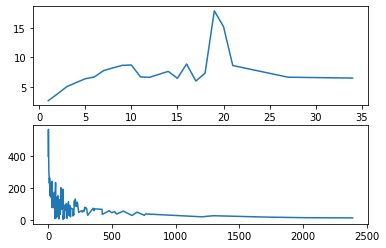

In [0]:
import numpy as np
Red_netscience = nx.read_gml('/content/netscience.gml')
Red_asjuly06 = nx.read_gml('/content/as-22july06.gml')


def asort(Red):
	asortatividad={} 
	for nodo_i in Red.nodes():
		#Calculo grado del nodo i
		grado_i=Red.degree[nodo_i]

		grado_vecinos_i=[]
		vecinos_nodo_i = Red.neighbors(nodo_i) # G.neighbors(node) devuelve un iterator
		for vecino in vecinos_nodo_i:
		  grado_vecinos_i.append(Red.degree[vecino])
		
		if len(grado_vecinos_i)==0: #no podemos hacer la media de un array vacio
			grado_medio_vecinos_i=0
		else:
			grado_medio_vecinos_i=np.mean(grado_vecinos_i)

		#Si ya existe la key con el grado, le appendeo el nuevo valor medio
		if grado_i in asortatividad:
			asortatividad[grado_i].append(grado_medio_vecinos_i)
		#Si no, creo la key
		else:	
			asortatividad[grado_i]=[grado_medio_vecinos_i]
	#Para cada grado calculo el promedio del promedio de los grados de los vecinos de cada nodo
	for grado in asortatividad:
		asortatividad[grado]=np.mean(asortatividad[grado])

	lists= sorted(asortatividad.items()) # sorted by key, return a list of tuples
	x, y = zip(*lists) # unpack a list of pairs into two tuples

	#Saco el grado 0 si es que existe porque no aporta informacion y complica el analisis posterior con logaritmos
	if x[0]==0:
		x, y = x[1:],y[1:]

	return(x,y)

asortatividad_netscience=asort(Red_netscience)
asortatividad_asjuly06=asort(Red_asjuly06)

plt.figure(1)
plt.subplot(211)
plt.plot(asortatividad_netscience[0],asortatividad_netscience[1])
plt.subplot(212)
plt.plot(asortatividad_asjuly06[0],asortatividad_asjuly06[1])
plt.show()

##ii.

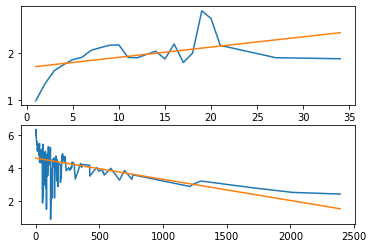

In [0]:
def exponente_correlacion(asortatividad):
	z=np.polyfit(asortatividad[0], np.log(asortatividad[1]), 1)
	p=np.poly1d(z)
	mu=z[1]
	#devuelve mu (factor de correlacion) y el fit lineal p
	return(mu,p)

plt.figure(1)
plt.subplot(211)
x_netscience=asortatividad_netscience[0]
y_netscience=np.log(asortatividad_netscience[1])

mu_netscience,p_netscience=exponente_correlacion(asortatividad_netscience)
fit_netscience=p_netscience(asortatividad_netscience[0])

plt.plot(x_netscience,y_netscience)
plt.plot(x_netscience,fit_netscience)


plt.subplot(212)
x_asjuly06=asortatividad_asjuly06[0]
y_asjuly06=np.log(asortatividad_asjuly06[1])

mu_asjuly06,p_asjuly06=exponente_correlacion(asortatividad_asjuly06)
fit_asjuly06=p_asjuly06(asortatividad_asjuly06[0])

plt.plot(x_asjuly06,y_asjuly06)
plt.plot(x_asjuly06,fit_asjuly06)
plt.show()

#No entiendo como es que ambos modelos podrian aplicar en simultaneo si uno es una exponencial y el otro es una lineal.
#Para obtener el u hay que tomar logaritmo de k_nn(k) y con eso fitear con una lineal 

##iii.


##iv.

In [0]:
Se, S1, S2, S3=0, 0, 0, 0
for enlace in Red_netscience.edges():
	nodo_i=enlace[0]
	nodo_j=enlace[1]
	#Sumatoria sobre los enlaces distintos, de 2 ki kj
	Se += 2*Red_netscience.degree[nodo_i]*Red_netscience.degree[nodo_j] 

for nodo in Red_netscience.nodes():
	S1+=Red_netscience.degree[nodo]
	S2+=Red_netscience.degree[nodo]**2
	S3+=Red_netscience.degree[nodo]**3

r= (S1*Se - S2*S2)/ (S1*S3-S2*S2)

print(Se, S1, S2, S3)
print(r)

350220 5484 38052 450738
0.4616224667525835
